In [1]:
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from utils import load_parquet_to_df_list, constant_segmentation, interpolate_segments
from approximation.paa import PAA
from discretization.sax.sax import SAX
from discretization.sax.graphics import plot_paa_sax_symbols

In [2]:
path = "../../../0_data/synth_pattern_data_for_synth_drive_generation"
df_list = load_parquet_to_df_list(path)

# do not use metadata of time series
df_orig = [df["dim_0"].to_frame() for df in df_list]

In [3]:
df_list[0]

,time,pattern_main_id,pattern_sub_id,dim_0
0,0.1,1,7,70.902463
1,0.2,1,7,70.282942
2,0.3,1,7,68.703804
3,0.4,1,7,64.193219
4,0.5,1,7,60.321183
...,...,...,...,...
896,90.8,2,1,79.357289
897,90.9,2,1,88.933892
898,91.0,2,1,83.036114
899,91.1,2,1,85.052833


In [4]:
df_ts = df_list[0].iloc[:296,:]
df_ts

,time,pattern_main_id,pattern_sub_id,dim_0
0,0.1,1,7,70.902463
1,0.2,1,7,70.282942
2,0.3,1,7,68.703804
3,0.4,1,7,64.193219
4,0.5,1,7,60.321183
...,...,...,...,...
291,29.6,-1,-1,47.045822
292,29.7,-1,-1,49.040281
293,29.8,-1,-1,45.672781
294,29.9,-1,-1,49.810377


In [5]:
fpath = os.path.join(mpl.get_data_path(), r"C:\Users\danie\Documents\Karlsruhe\03_KIT_Studium\07_Semester\Bachelorarbeit\Bachelorarbeit\Repo\implementation\3_output\fonts\lato\Lato-Regular.ttf")
prop = fm.FontProperties(fname=fpath, size=20)
blue_color = "#0E2356"
green_color = "#008052"
labelsize = 12
labelpad = 12
pad = labelpad

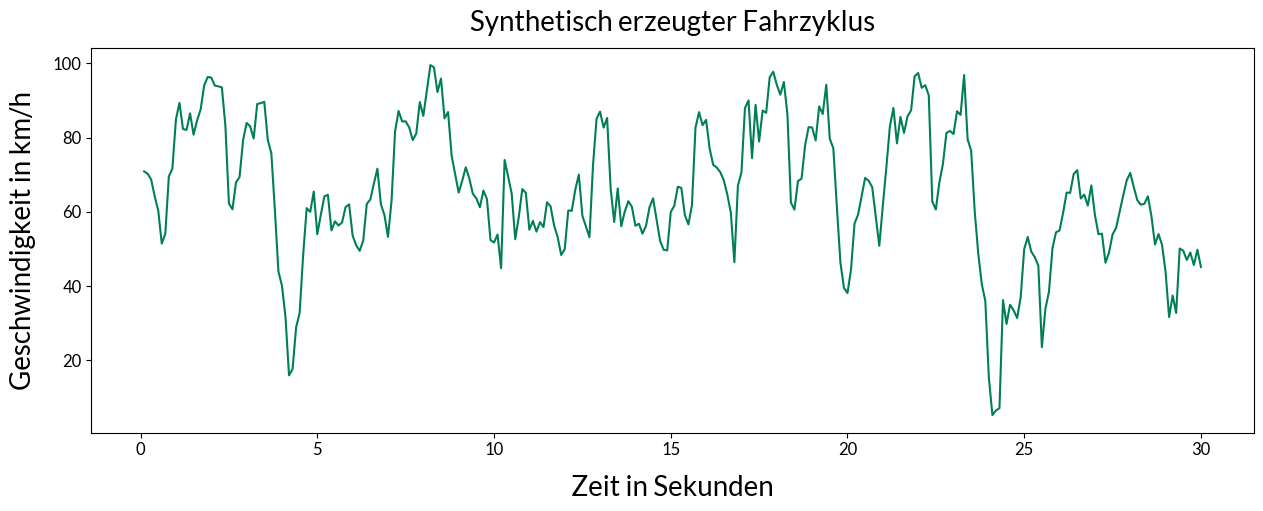

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df_ts['time'], df_ts['dim_0'], color=green_color)

# Set the x-axis ticks to show every second
interval = 5.0
positions = np.arange(0, max(df_ts['time']) + interval, interval)
labels = [int(i) for i in positions]
plt.xticks(positions, labels, fontproperties=prop, color="black")
plt.yticks(fontproperties=prop, color="black")

# Add labels and title to the plot
plt.xlabel("Zeit in Sekunden", fontproperties=prop, color="black", labelpad=labelpad)
plt.ylabel("Geschwindigkeit in km/h", fontproperties=prop, color="black", labelpad=labelpad)
plt.title("Synthetisch erzeugter Fahrzyklus", fontproperties=prop, color="black", pad=pad)

# Get the axis object
ax = plt.gca()

# Set the color of the spines (the box surrounding the plot)
for spine in ax.spines.values():
    spine.set_edgecolor("black")

# Set the color of the tick marks and labels
ax.tick_params(axis='both', color="black", labelsize=labelsize)

plt.savefig("fahrzyklus.svg", bbox_inches='tight')
# Show the plot
plt.show()

In [7]:
from utils import z_normalize

df_norm = z_normalize(df_ts["dim_0"].to_frame())
df_norm

,dim_0
0,0.309947
1,0.275798
2,0.188753
3,-0.059879
4,-0.273313
...,...
291,-1.005076
292,-0.895137
293,-1.080760
294,-0.852688


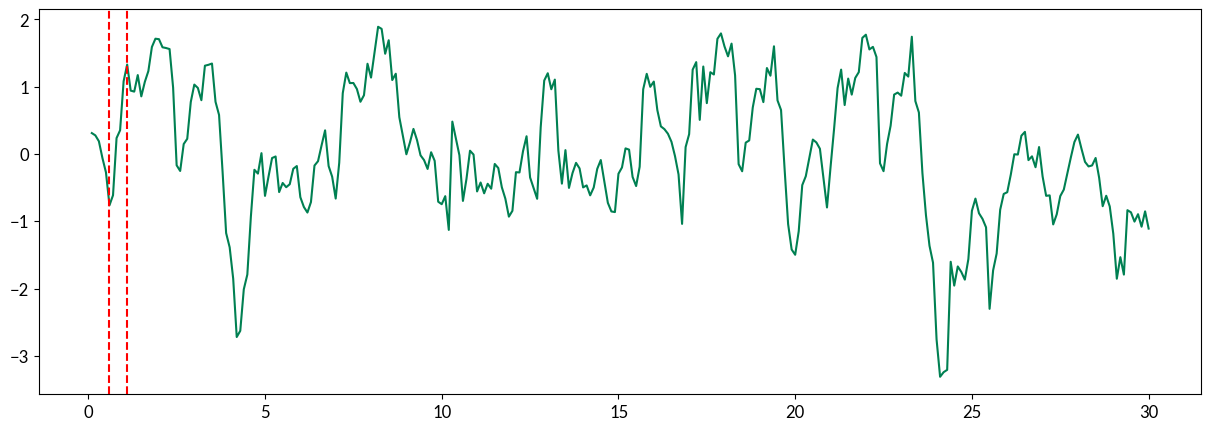

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(df_ts['time'], df_norm, color=green_color)

# Set the x-axis ticks to show every second
interval = 5.0
positions = np.arange(0, max(df_ts['time']) + interval, interval)
labels = [int(i) for i in positions]
plt.xticks(positions, labels, fontproperties=prop, color="black")
plt.yticks(fontproperties=prop, color="black")

# Add labels and title to the plot
#plt.xlabel("Zeit in Sekunden", fontproperties=prop, color="black", labelpad=labelpad)
#plt.ylabel("Geschwindigkeit in km/h", fontproperties=prop, color="black", labelpad=labelpad)
#plt.title("Synthetisch erzeugter Fahrzyklus", fontproperties=prop, color="black", pad=pad)

# Get the axis object
ax = plt.gca()

# Define the specific xticks
start, end, num_segments = constant_segmentation(df_norm.shape[0], window_size=5)
adj_start = (start / 10) + 0.1
adj_end = (end / 10) + 0.1
xticks = [adj_start[1], adj_end[1]]

# Plot a vertical dashed line at each xtick
for xtick in xticks:
    ax.axvline(x=xtick, color='red', linestyle='dashed')

# Set the color of the spines (the box surrounding the plot)
for spine in ax.spines.values():
    spine.set_edgecolor("black")

# Set the color of the tick marks and labels
ax.tick_params(axis='both', color="black", labelsize=labelsize)

plt.savefig("sliding_window.svg", bbox_inches='tight')
# Show the plot
plt.show()

In [9]:
window_size = 5
paa = PAA(window_size)
df_paa = paa.transform(df_norm)
df_paa_inv = paa.inv_transform(df_paa, df_norm.shape[0])

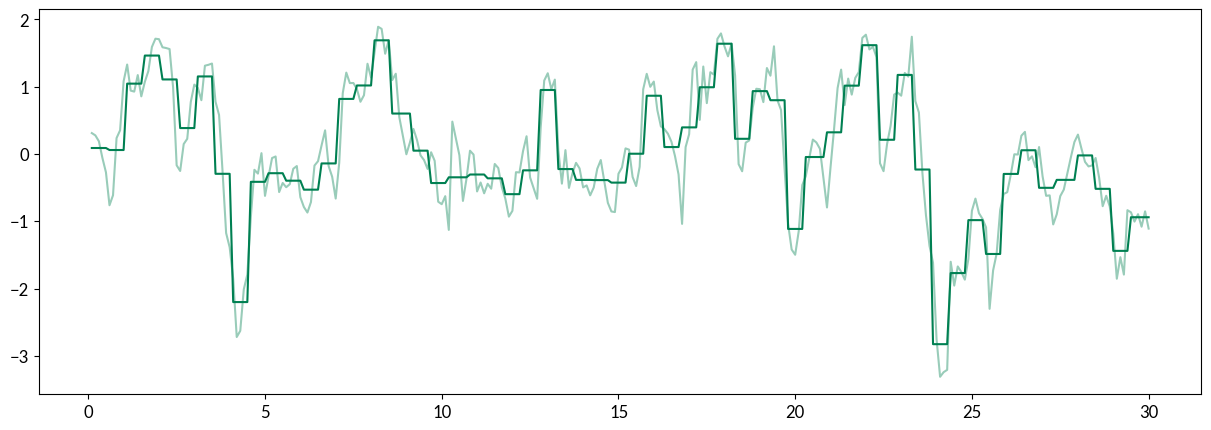

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(df_ts['time'], df_paa_inv, color=green_color)
plt.plot(df_ts['time'], df_norm, color=green_color, alpha=0.4)

# Set the x-axis ticks to show every second
interval = 5.0
positions = np.arange(0, max(df_ts['time']) + interval, interval)
labels = [int(i) for i in positions]
plt.xticks(positions, labels, fontproperties=prop, color="black")
plt.yticks(fontproperties=prop, color="black")

# Add labels and title to the plot
#plt.xlabel("Zeit in Sekunden", fontproperties=prop, color="black", labelpad=labelpad)
#plt.ylabel("Geschwindigkeit in km/h", fontproperties=prop, color="black", labelpad=labelpad)
#plt.title("Synthetisch erzeugter Fahrzyklus", fontproperties=prop, color="black", pad=pad)

# Get the axis object
ax = plt.gca()

# Set the color of the spines (the box surrounding the plot)
for spine in ax.spines.values():
    spine.set_edgecolor("black")

# Set the color of the tick marks and labels
ax.tick_params(axis='both', color="black", labelsize=labelsize)

plt.savefig("paa_inverse_transformation.svg", bbox_inches='tight')
# Show the plot
plt.show()

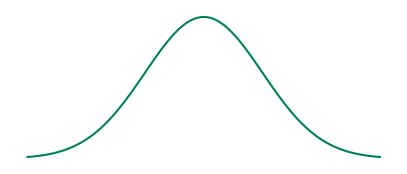

In [11]:
mean = 0
std = 1
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
y = 1 / (np.sqrt(2 * np.pi) * std) * np.exp(- (x - mean) ** 2 / (2 * std ** 2))

plt.figure(figsize=(5, 2))
plt.plot(x, y, color=green_color)
plt.axis("off")
plt.savefig("standard_normal.svg", bbox_inches="tight")
plt.show()

In [12]:
alphabet_size = 6
sax = SAX(alphabet_size)
df_sax = sax.transform(df_paa)

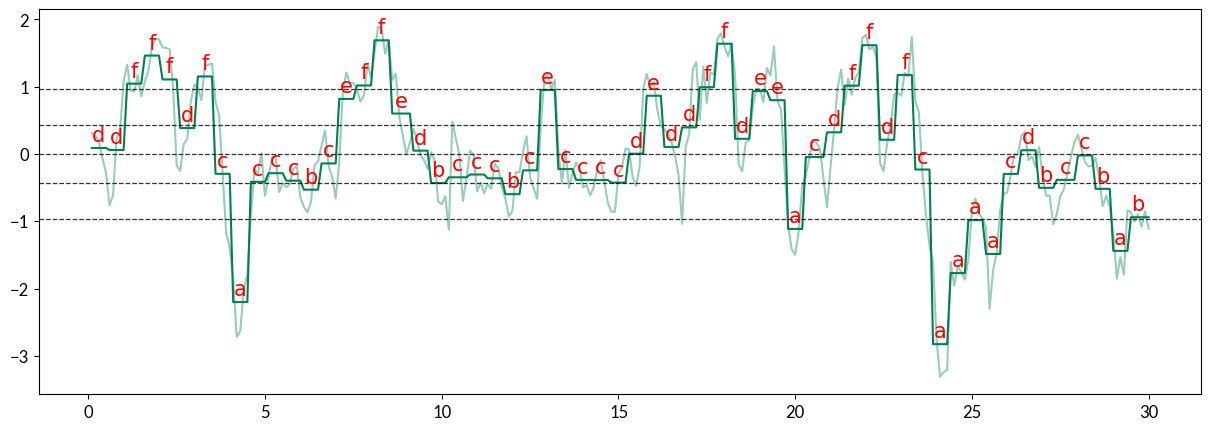

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(df_ts['time'], df_paa_inv, color=green_color)
plt.plot(df_ts['time'], df_norm, color=green_color, alpha=0.4)

# Set the x-axis ticks to show every second
interval = 5.0
positions = np.arange(0, max(df_ts['time']) + interval, interval)
labels = [int(i) for i in positions]
plt.xticks(positions, labels, fontproperties=prop, color="black")
plt.yticks(fontproperties=prop, color="black")

# Add labels and title to the plot
# plt.xlabel("Zeit in Sekunden", fontproperties=prop, color="black", labelpad=labelpad)
# plt.ylabel("Geschwindigkeit in km/h", fontproperties=prop, color="black", labelpad=labelpad)
# plt.title("Synthetisch erzeugter Fahrzyklus", fontproperties=prop, color="black", pad=pad)

# Get the axis object
ax = plt.gca()

# plot breakpoints as horizontal lines
for line in sax.breakpoints:
    ax.axhline(line, c="black", alpha=0.8, ls="dashed", lw=0.9)
    
# plot symbols above each step
step_voffset = 0.1
counter = 0
sax_counter = -1
for i, x in enumerate(df_ts['time']):
    counter += 1
    if counter < paa.window_size:
        continue
    sax_counter += 1
    counter = 0
    mid_x = (df_ts["time"][i - 4] + df_ts['time'][i]) / 2
    ax.text(mid_x, df_paa_inv.iloc[i, 0] + step_voffset, df_sax.iloc[sax_counter, 0], c="red", ha='center', fontsize=15)

# Set the color of the spines (the box surrounding the plot)
for spine in ax.spines.values():
    spine.set_edgecolor("black")

# Set the color of the tick marks and labels
ax.tick_params(axis='both', color="black", labelsize=labelsize)

plt.savefig("sax_inverse_transformation.svg", bbox_inches='tight')
# Show the plot
plt.show()